In [1]:
### Library Imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from plotIndicators import plot_function
from getTickers import import_stock_data


In [2]:
### Load in Stock Data
tickers = ['AAPL', 'GOOG']
start_date = '2024-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data


[*********************100%%**********************]  2 of 2 completed


Price        Date       Close                    High                     Low  \
Ticker                   AAPL        GOOG        AAPL        GOOG        AAPL   
0      2024-01-02  185.639999  139.559998  188.440002  140.615005  183.889999   
1      2024-01-03  184.250000  140.360001  185.880005  141.089996  183.429993   
2      2024-01-04  181.910004  138.039993  183.089996  140.634995  180.880005   
3      2024-01-05  181.179993  137.389999  182.759995  138.809998  180.169998   
4      2024-01-08  185.559998  140.529999  185.600006  140.639999  181.500000   
..            ...         ...         ...         ...         ...         ...   
75     2024-04-19  165.000000  155.720001  166.399994  157.990005  164.080002   
76     2024-04-22  165.839996  157.949997  167.259995  159.184998  164.770004   
77     2024-04-23  166.899994  159.919998  167.050003  160.479996  164.919998   
78     2024-04-24  169.020004  161.100006  169.300003  161.389999  166.210007   
79     2024-04-25  169.889999  157.949997  170.610001  158.279999  168.151093   

Price               
Ticker        GOOG  
0       137.740005  
1       138.429993  
2       138.009995  
3       136.850006  
4       137.880005  
..             ...  
75      153.910004  
76      155.660004  
77      157.964996  
78      158.820007  
79      152.768005  

[80 rows x 7 columns]

In [3]:
### MACD Function for Multiple Stocks
def get_macd(tickers, df):
    # Initialize empty DataFrame to store MACD data with correct columns
    macd_df = pd.DataFrame(index = df.index, columns=tickers[::-1])  # Reverse the tickers list
    macd_vals = {}

    # Loop for MACD calculation and df population
    for t in tickers:
        # Calculate 12-day Exponential Moving Averages (EMA)
        ema_12 = df['Close'][t].ewm(span = 12, adjust = False).mean()
        # Calculate 26-day Exponential Moving Averages (EMA)
        ema_26 = df['Close'][t].ewm(span = 26, adjust = False).mean()
        # Calculate MACD line (12-day EMA minus 26-day EMA)
        macd = ema_12 - ema_26
        # Add MACD column to the DataFrame
        macd_df[t] = macd
        # Append last MACD value to macd_vals dictionary
        macd_vals[t] = macd_df[t].iloc[-1]

    return macd_df, macd_vals

# Example usage
macd_df, macd_vals = get_macd(tickers, stock_data)
print(macd_df.tail())
print("MACD values list: ", macd_vals)

        GOOG      AAPL
75  2.889679 -1.858937
76  2.817904 -2.012186
77  2.886708 -2.024764
78  3.001849 -1.842427
79  2.806568 -1.609173
MACD values list:  {'AAPL': -1.6091728720367655, 'GOOG': 2.8065677560944664}


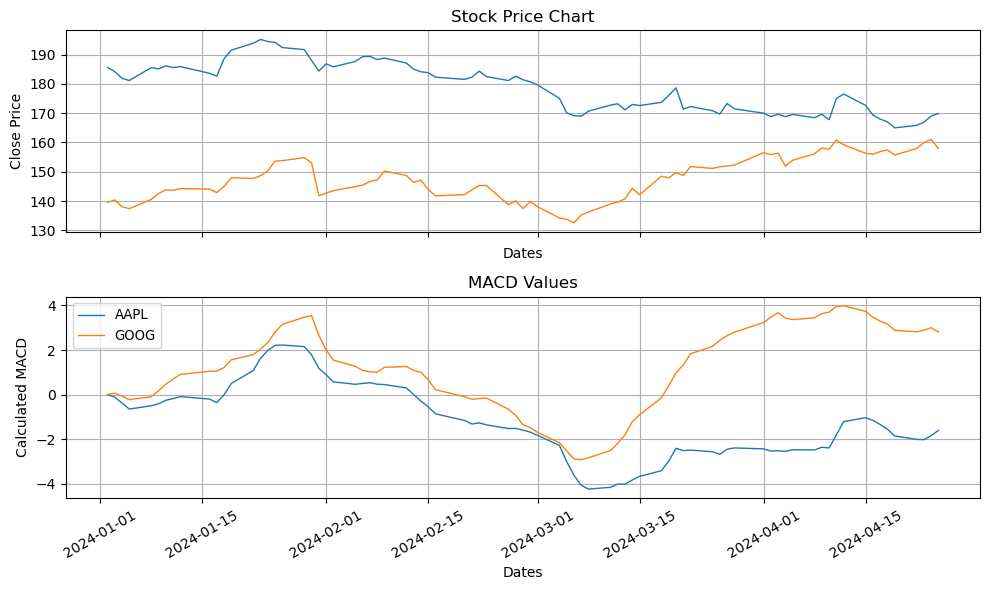

In [4]:
### Plot RSI and Stock Dataframes
plot = plot_function(stock_data, macd_df, tickers, indicator_type = 'MACD')
plot